# Programar primera red neuronal desde cero

Se busca que la red neuronal separe dos clases dadas en círculos concéntricos, el círculo exterios de color azul y el círculo interno de color rojo.

Se entrenará una red que clasifique correctamente estos datos.

## Importar librerías necesarias

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# para traer un conjunto de datos de prueba
from sklearn.datasets import make_circles

## Crear dataset (conjunto de datos)

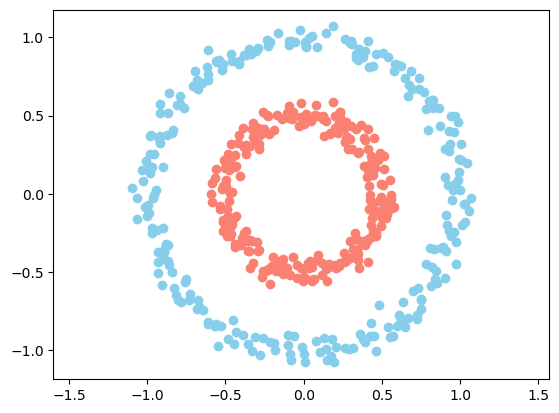

In [2]:
n = 500 # numero de datos
p = 2  # numero caracteristicas

X, Y = make_circles(n_samples=n, # numero de muestras
                    factor=0.5, # entreo 0 y 1, 1: circulo interno con radio mayor
                    noise= 0.05) # entre 0 y 1: 1 datos muy dispersos no se diferencia circulo interno de externo
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show(); # simbolo ; para que no salga letrero al inicio de l agrafica

## Se crea la estructura básica de una capa

La red neuronal se creará por capas, por tanto un objeto básico `capa_neuronal` que tendrá distintos métodos, como por ejemplo función de activación, número de neuronas, entre otras.

In [3]:
# objeto capa neuronal
class capa_neuronal():
    # se inicializa con numero de conexiones, numero de nueronas y funcion de activacion
    def __init__(self, n_conexiones, n_neuronas, func_activacion):
        # funcion de activacion o transferencia
        self.func_activacion = func_activacion # sera la que se pase en el parametro func_activation

        # bias, se tienen tantos como numero de neurona en capa
        self.b =  np.random.rand(1,n_neuronas) * 2 - 1 # aletaroio entre -1 y 1

        # matriz W
        self.W =  np.random.rand(n_conexiones,n_neuronas) * 2 - 1 # aletaroio entre -1 y 1

## Se crean las funciones de activación

In [4]:
# funcion sigmoide
sigmoide = (lambda x: 1/ (1+np.e ** (-x)), # funcion sigmoide
            lambda x: x * (1 - x)) # derivada de funcion sigmoide


## Función para crear la red

In [5]:
def crear_red(topologia, func_activacion):
    nn = [] # vector para crear la estructura de capas
    for l, capa in enumerate(topologia[:-1]):

        nn.append(capa_neuronal(topologia[l], topologia[l + 1], func_activacion))
    return nn

## Función para entrenar la red neuronal

In [6]:
# funcion de costo
func_costo = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), # MSE: error medio cuadratico
              lambda Yp, Yr: (Yp - Yr)) # derivada de error medio cuadratico

# funcion de entrenamiento backpropagation
def entrenar(red_neuronal, X, Y, func_costo, lr = 0.5, train=True):
    # dato inicial para inicializar el entrenamiento
    salida = [(None, X)] # vector para guardar salidas parciales

    # paso hacia adelante: hace dos cosas, 1era suma ponderada; 2da aplica funcion de activacion
    for l, layer in enumerate(red_neuronal):
        z = salida[-1][1] @ red_neuronal[l].W  + red_neuronal[l].b  # suma ponderada
        a = red_neuronal[l].func_activacion[0](z)

        salida.append((z, a))

    if train:
        # back propagation
        deltas = []
        for l in reversed(range(0, len(red_neuronal))):

            z = salida[l + 1][0]
            a = salida[l + 1][1]
            if l == len(red_neuronal) -1:
                # calcular delta ultima capa
                deltas.insert(0, func_costo[1](a, Y) * red_neuronal[l].func_activacion[1](a))
            else:
                # calcular delta respecto a capa previa
                deltas.insert(0, deltas[0] @ W_.T * red_neuronal[l].func_activacion[1](a))

            W_ =  red_neuronal[l].W

            # gradient descent
            red_neuronal[l].b = red_neuronal[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            red_neuronal[l].W = red_neuronal[l].W - salida[l][1].T @ deltas[0] * lr

    return(salida[-1][1])

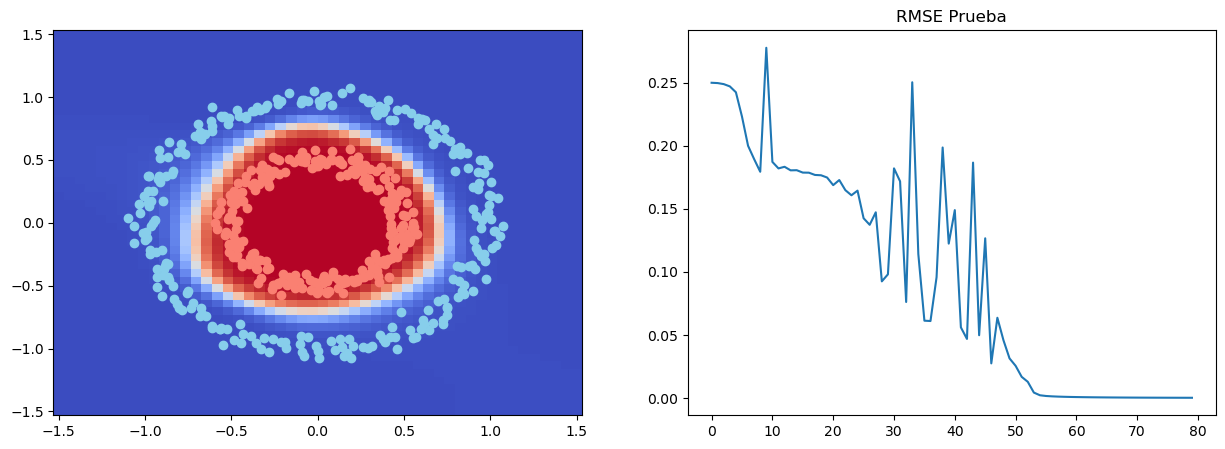

In [9]:
topologia = [p, 4, 8, 1]
red_neuronal = crear_red(topologia, sigmoide)

perdida = []
epocas = 2000
for i in range(epocas):
    # entrenamos la red
    pY = entrenar(red_neuronal, X, Y, func_costo, lr=0.08)
    if i%25 == 0:
        perdida.append(func_costo[0](pY, Y))

        res = 50

        x0_ = np.linspace(-1.5, 1.5, res)
        x1_ = np.linspace(-1.5, 1.5, res)

        Y_ = np.zeros((res, res))
        for i0, x0 in enumerate(x0_):
            for i1, x1 in enumerate(x1_):
                Y_[i0, i1] = entrenar(red_neuronal, np.array([[x0, x1]]), Y, func_costo, train=False)[0][0]

        fig, axes = plt.subplots(nrows=1,
                                 ncols=2,
                                 figsize=(15,5))

        # grafica izquierda
        axes[0].pcolormesh(x0_, x1_, Y_, cmap="coolwarm")
        axes[0].scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
        axes[0].scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
        clear_output(wait=True)
        # grafica derecha
        axes[1].plot(range(len(perdida)), perdida)
        axes[1].set_title('RMSE Prueba')
        plt.show();
        time.sleep(0.5)